In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/find_best.csv')

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,pin,size,threads,runtime,runtimestd,usertime,usertimestd,energy,energystd,MFLOP/J,GFLOP/s
0,True,500,1,0.434346,0.001402,0.434280,0.001406,6.592353,0.128244,37.884805,0.575002
1,True,500,2,0.217446,0.000064,0.434118,0.000076,4.114156,0.022729,60.705042,1.148562
2,True,500,3,0.147251,0.001730,0.434362,0.001323,3.237271,0.029025,77.148318,1.696085
3,True,500,4,0.109522,0.000457,0.434530,0.000544,2.803087,0.021146,89.098183,2.280355
4,True,500,5,0.105260,0.001091,0.520291,0.003487,2.737782,0.039351,91.223479,2.372697
...,...,...,...,...,...,...,...,...,...,...,...
347,False,1500,12,1.876092,0.030870,21.761858,0.057044,75.860680,0.442430,88.949243,3.596706
348,False,1500,13,1.898972,0.026695,24.386641,0.297392,77.597610,1.215618,86.958219,3.553371
349,False,1500,14,1.969793,0.021154,27.155590,0.285128,79.816101,0.793500,84.541213,3.425614
350,False,1500,15,2.112535,0.008445,31.290825,0.087529,84.406769,0.164669,79.943233,3.194149


In [3]:
df_grouped = df.groupby(['size', 'pin'])

/tmp/ipykernel_324383/3188051586.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


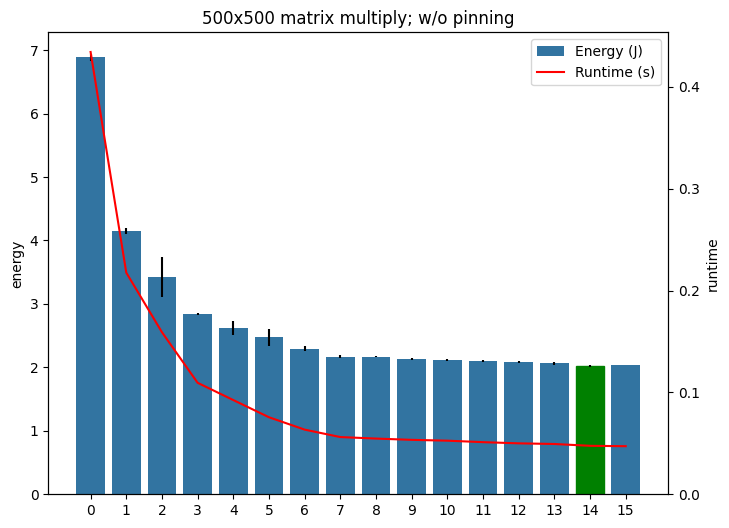

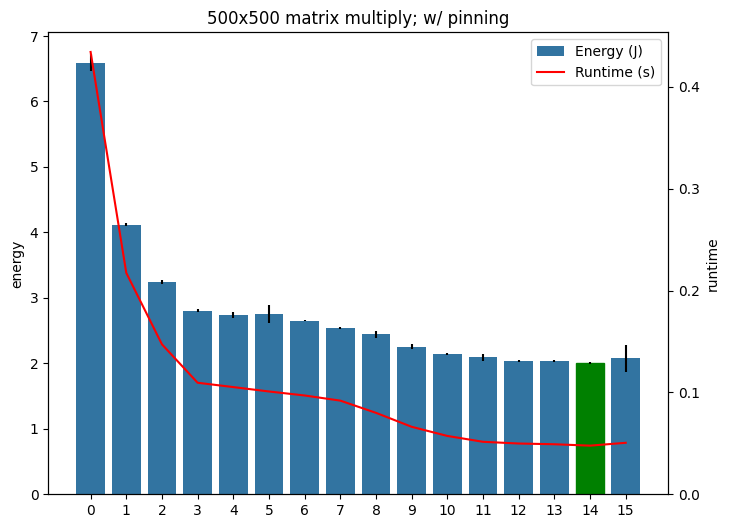

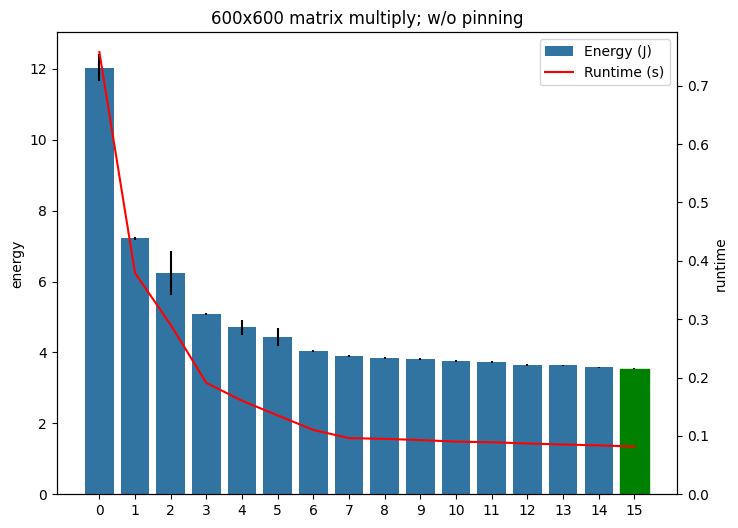

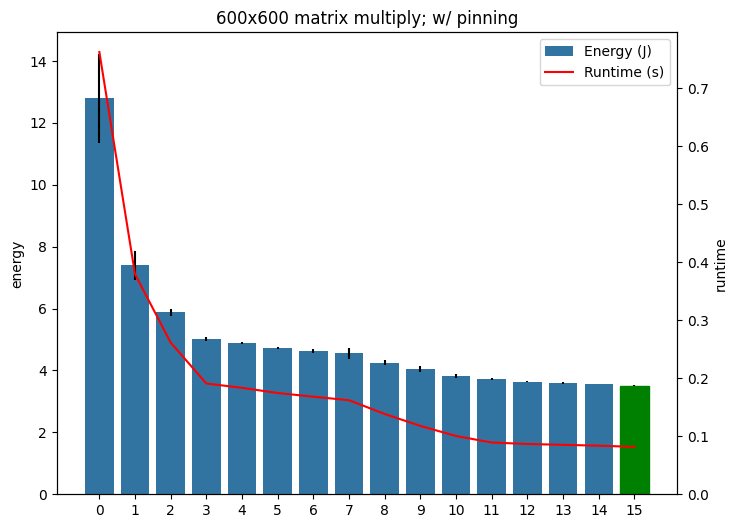

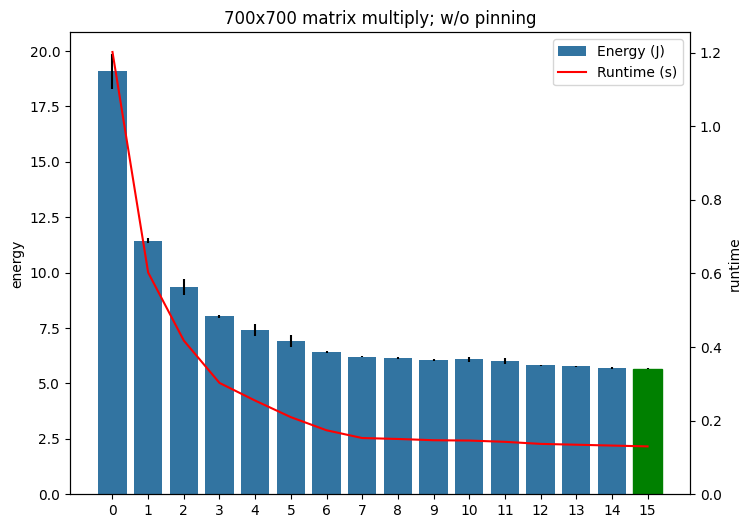

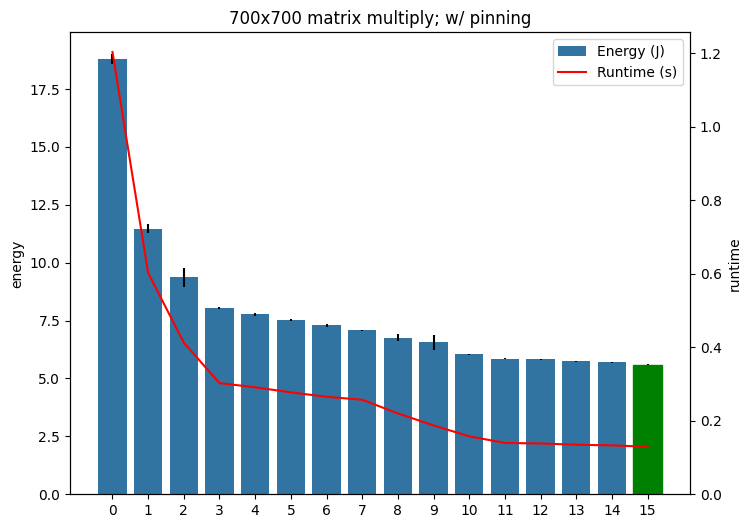

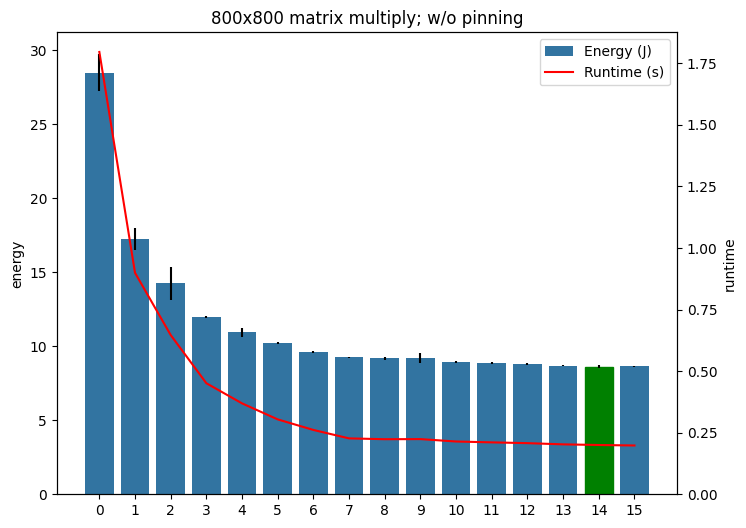

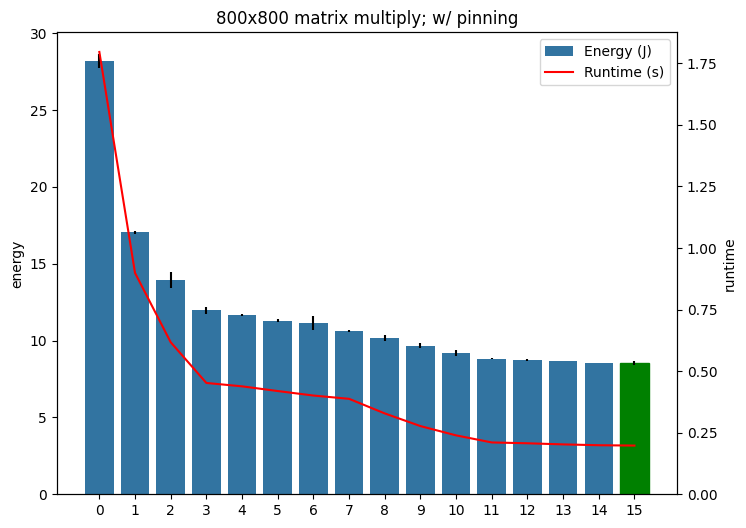

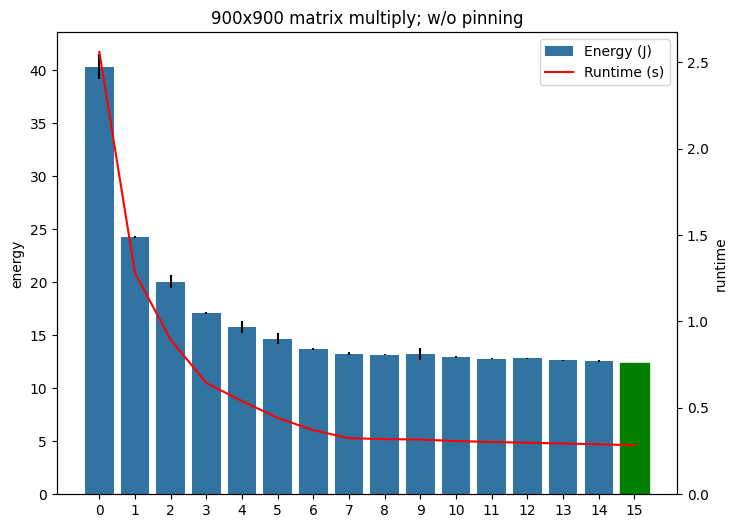

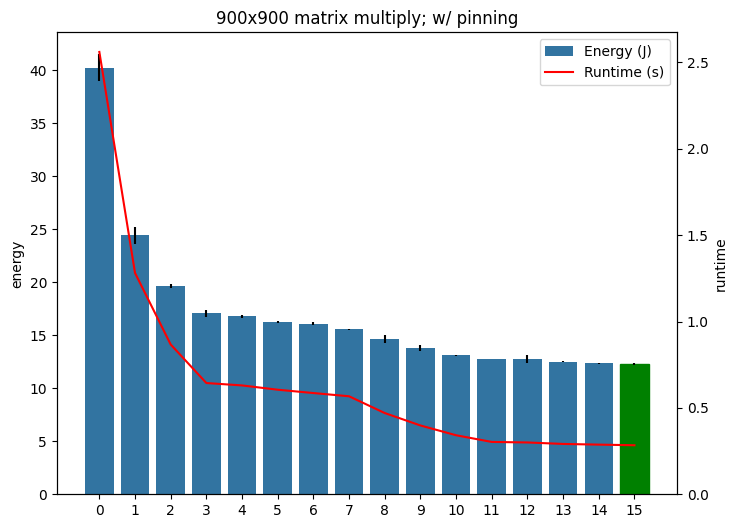

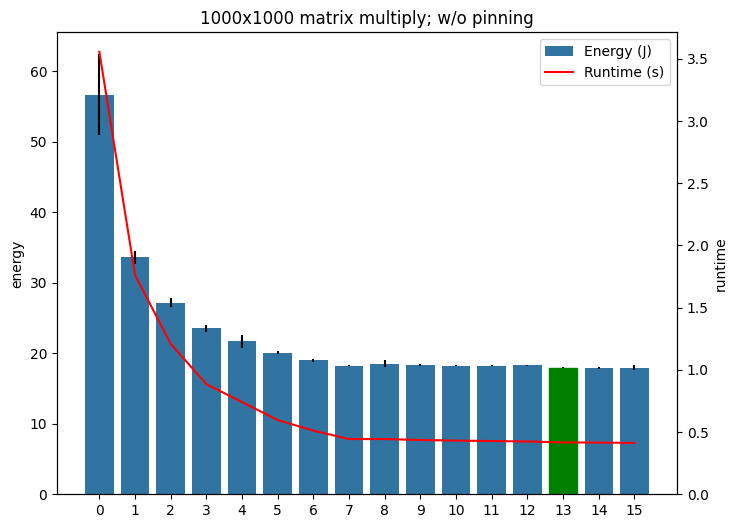

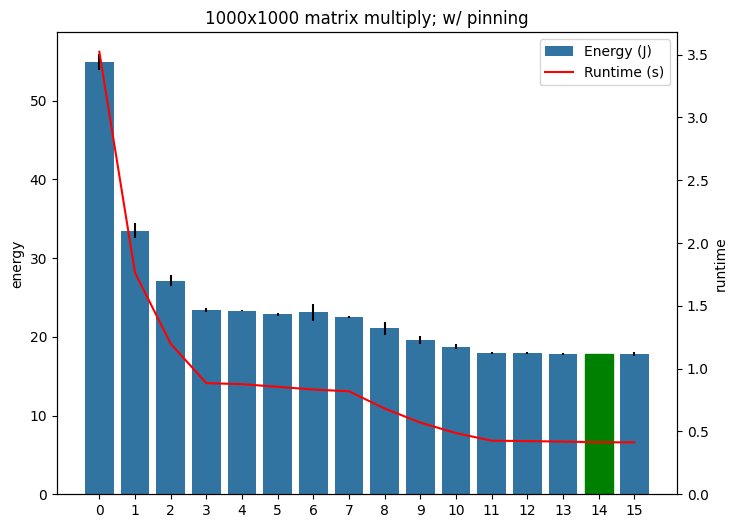

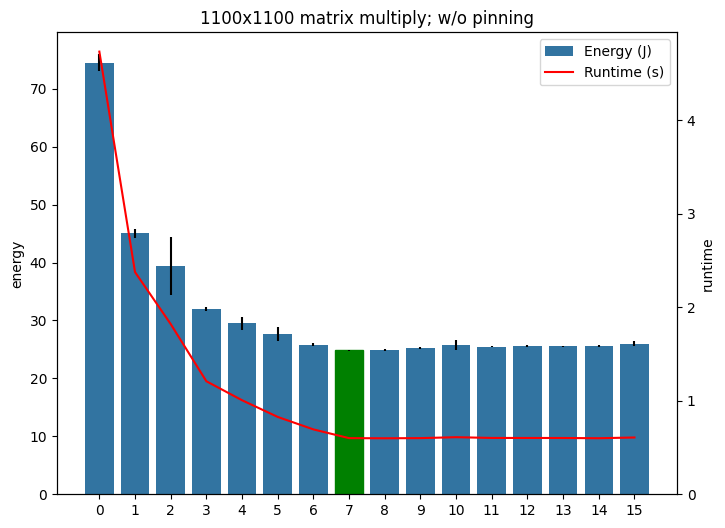

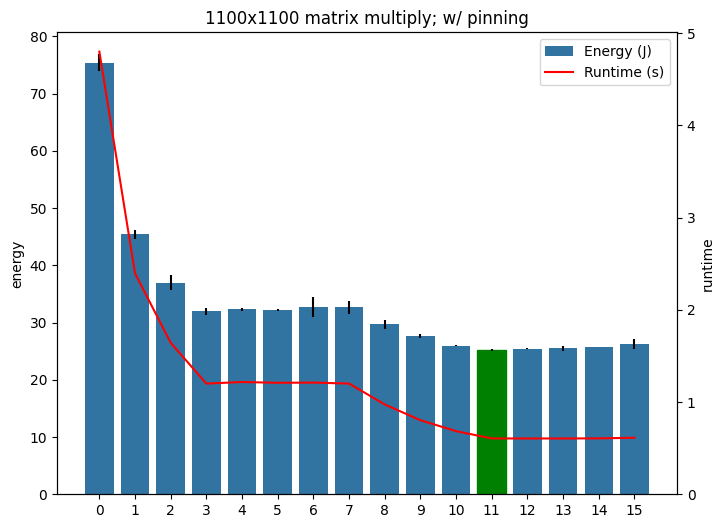

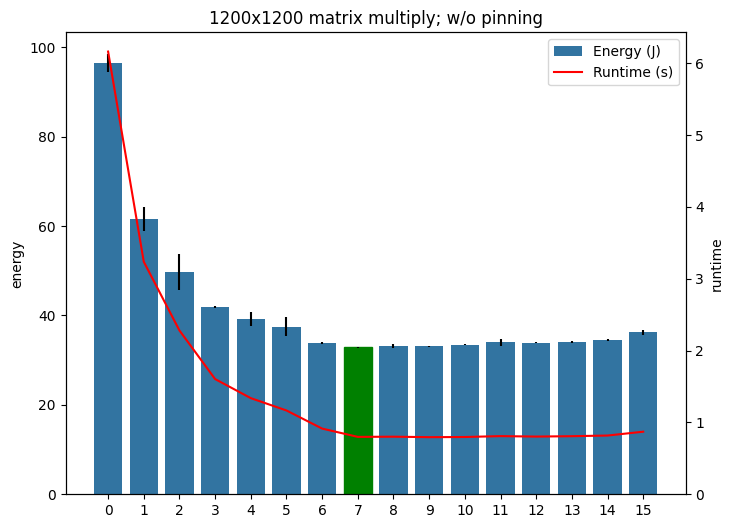

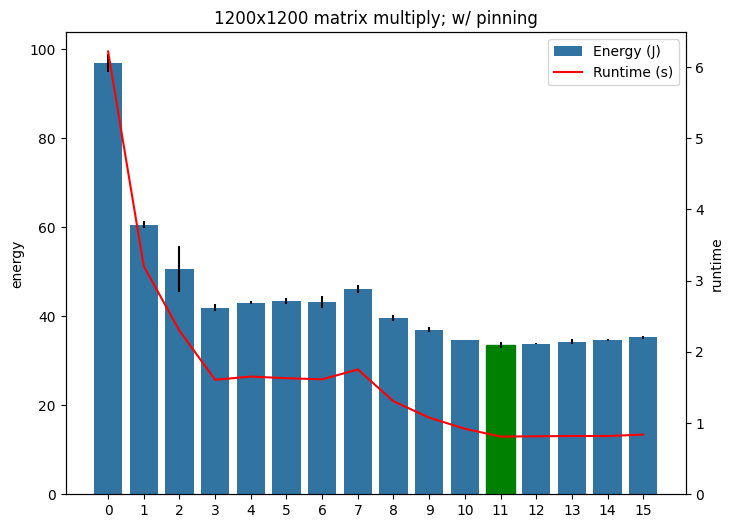

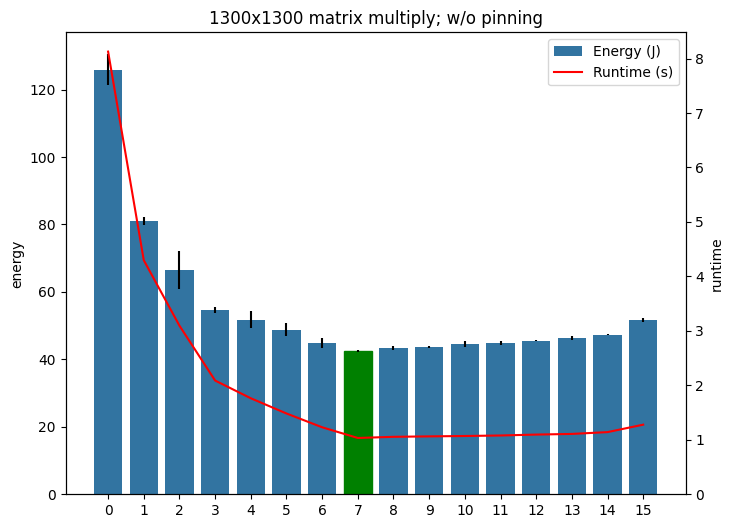

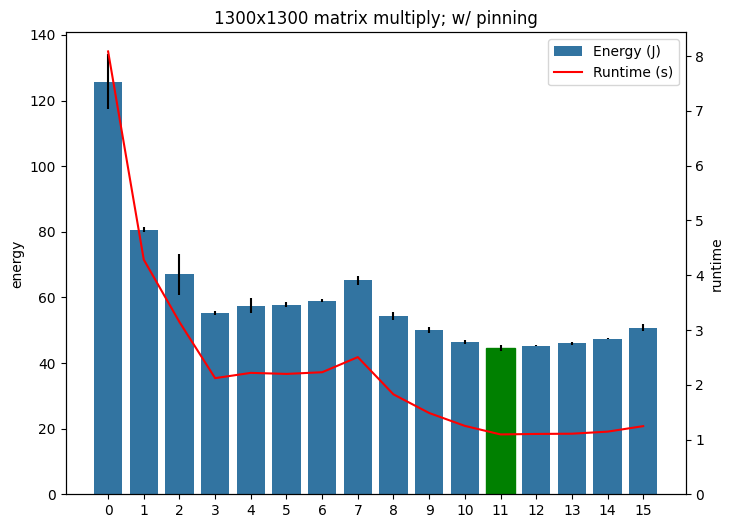

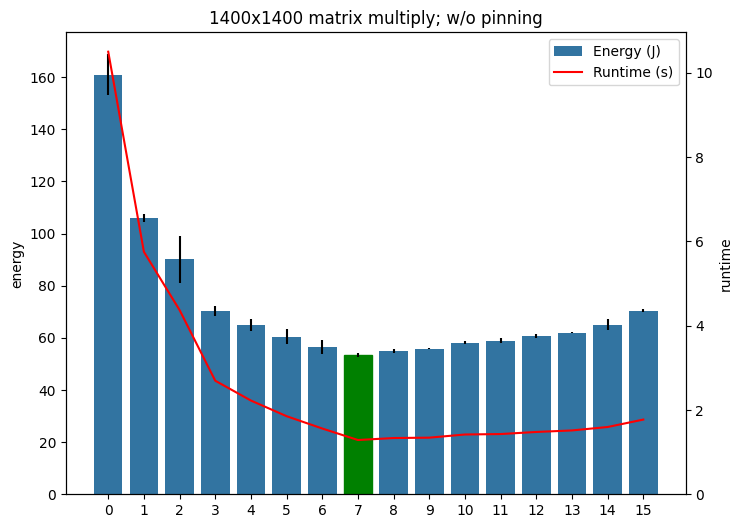

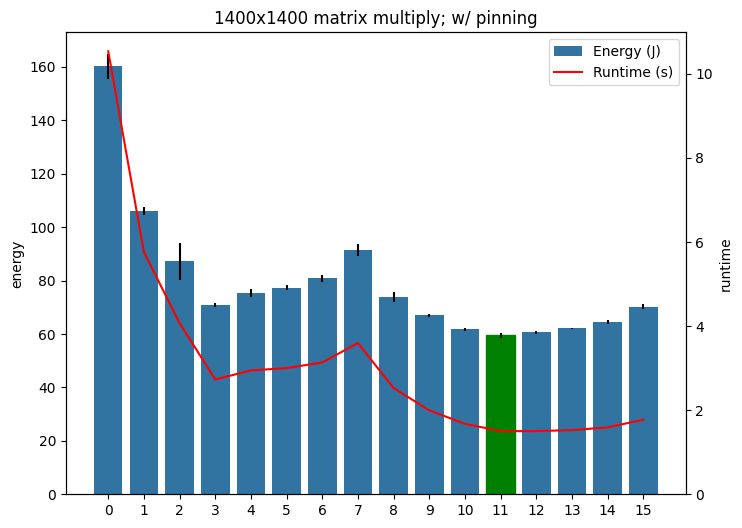

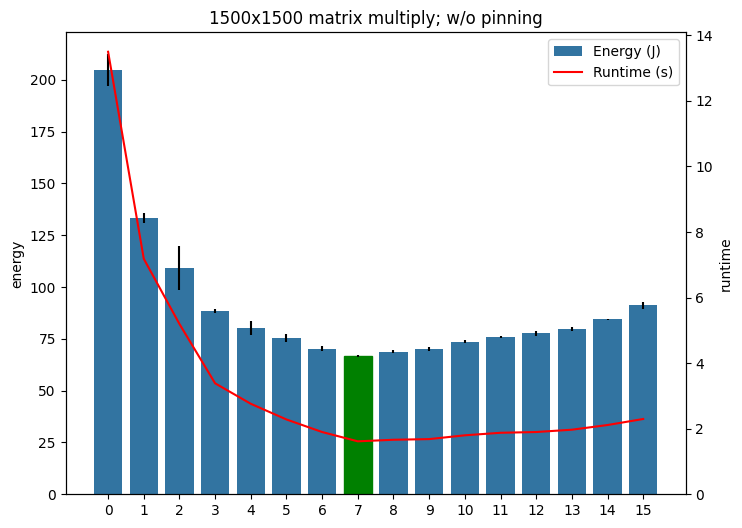

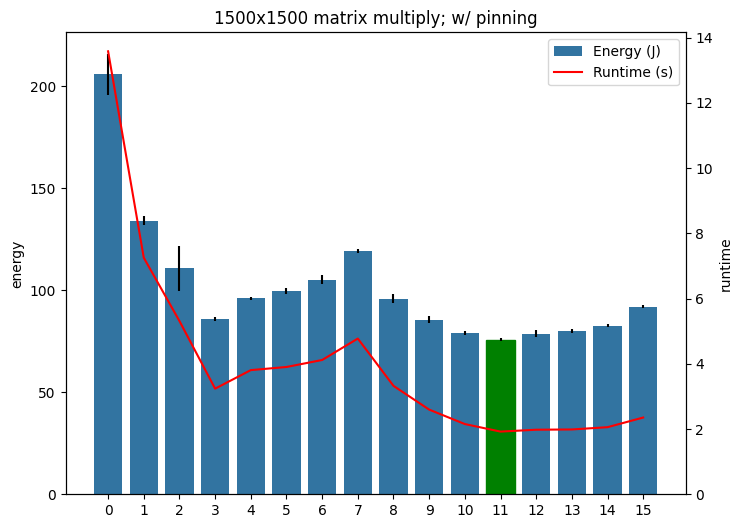

In [4]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energystd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

/tmp/ipykernel_324383/1063131660.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


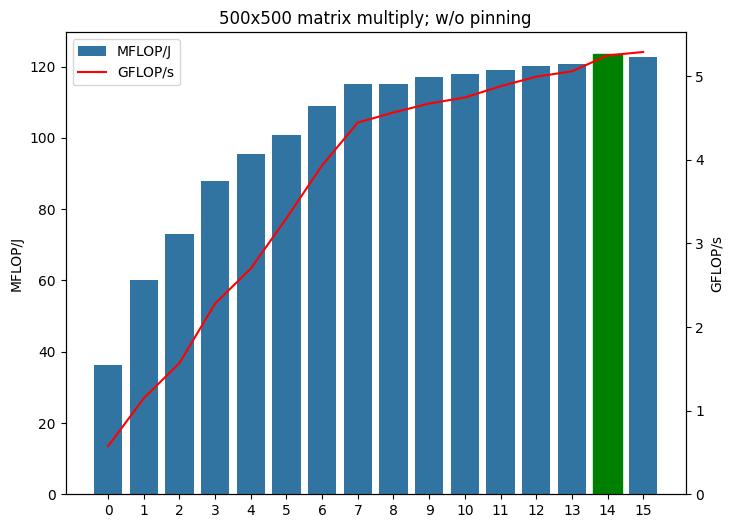

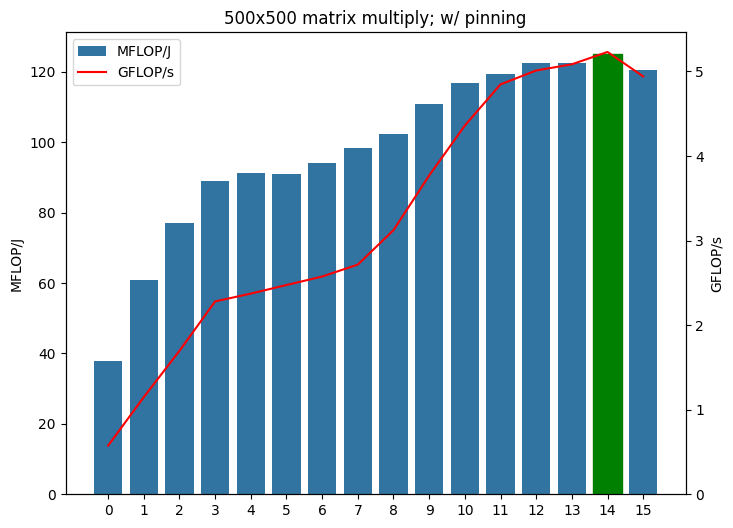

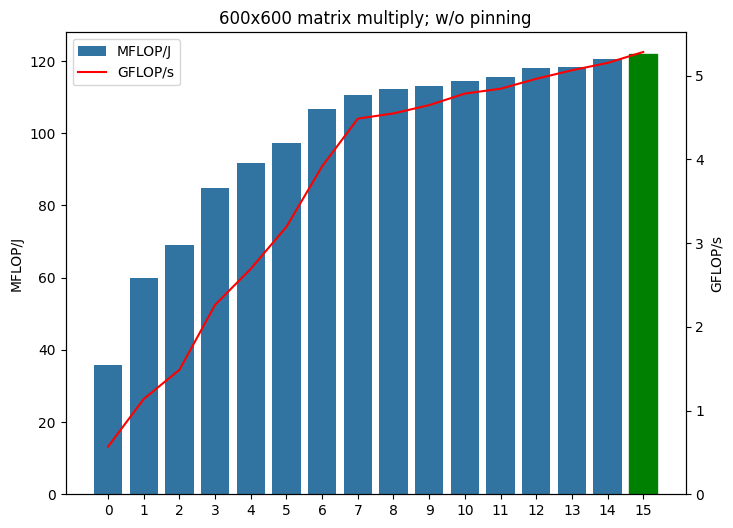

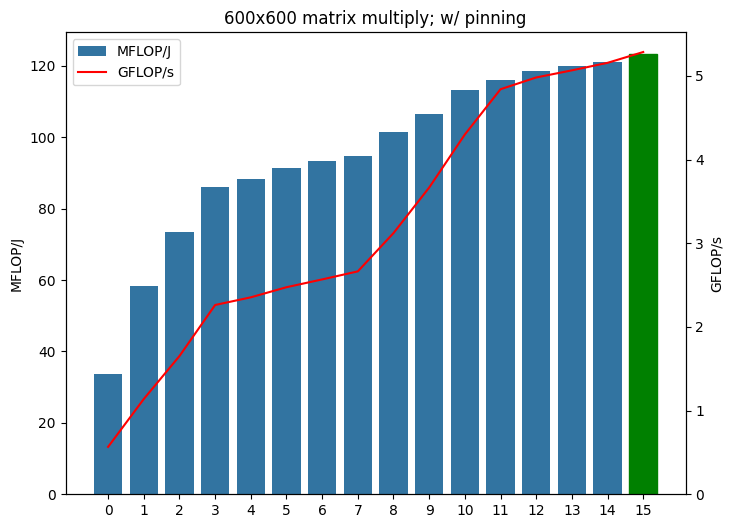

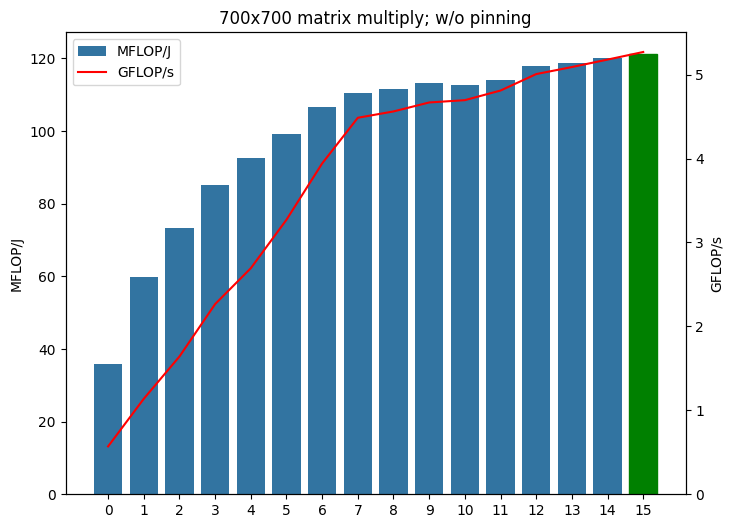

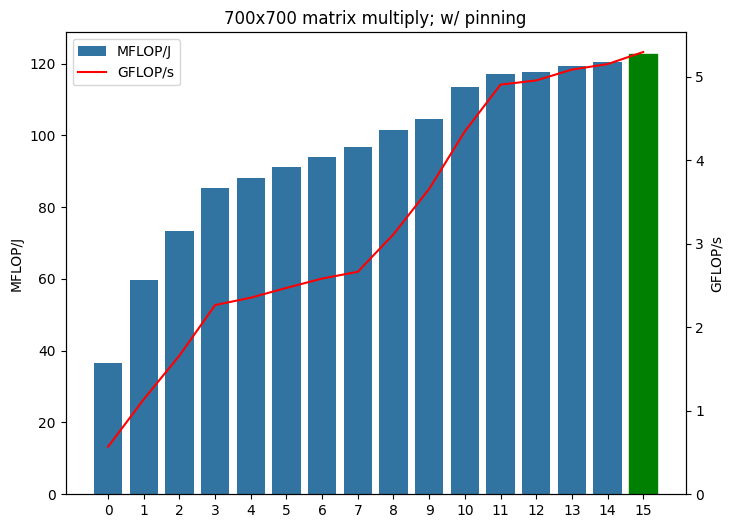

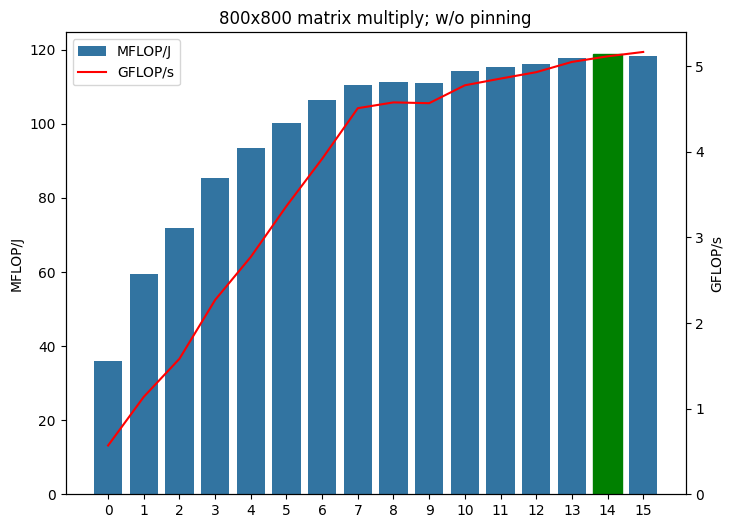

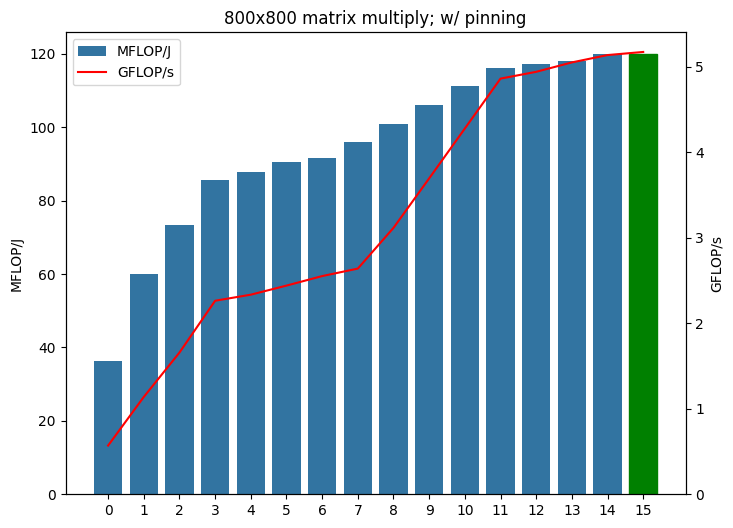

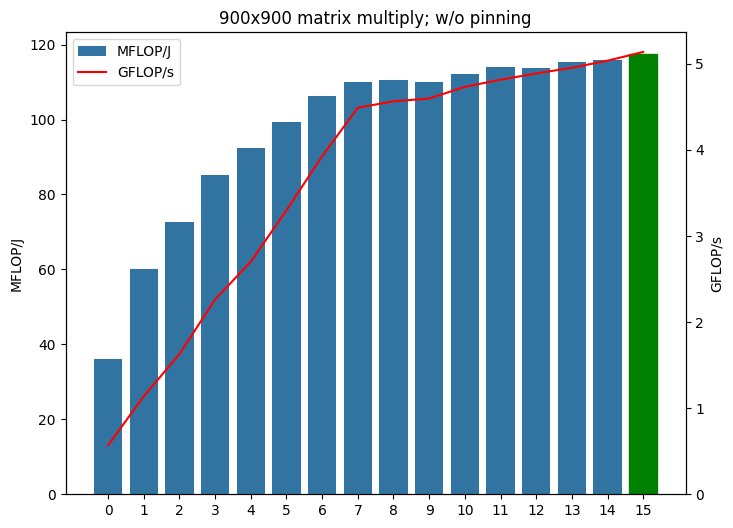

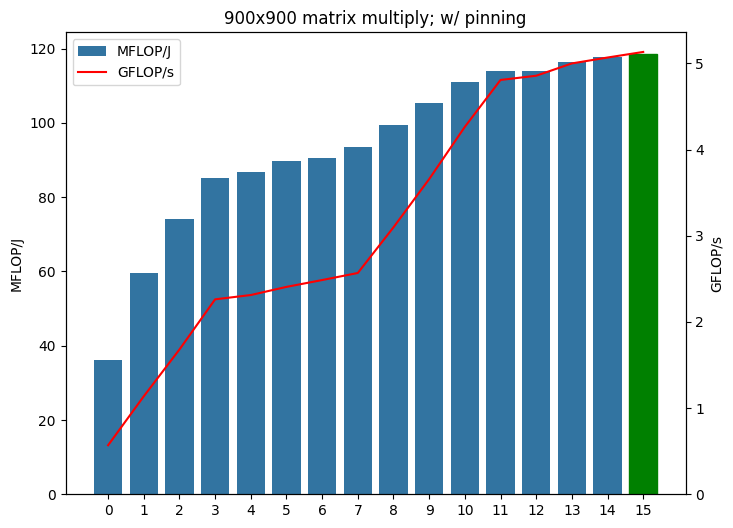

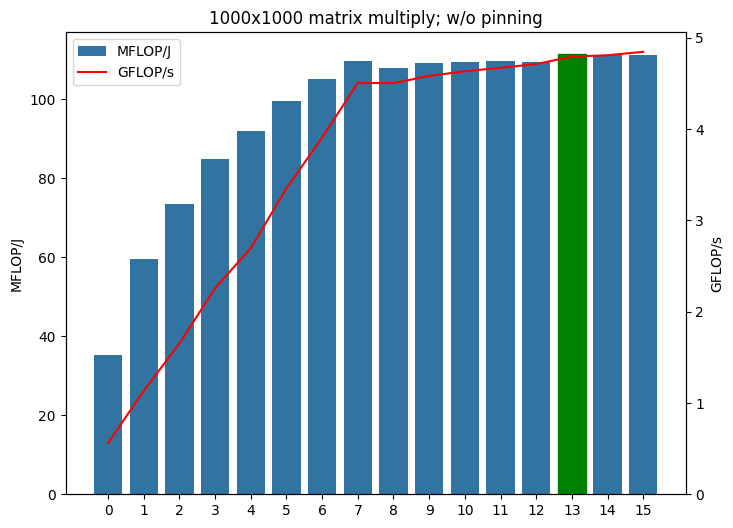

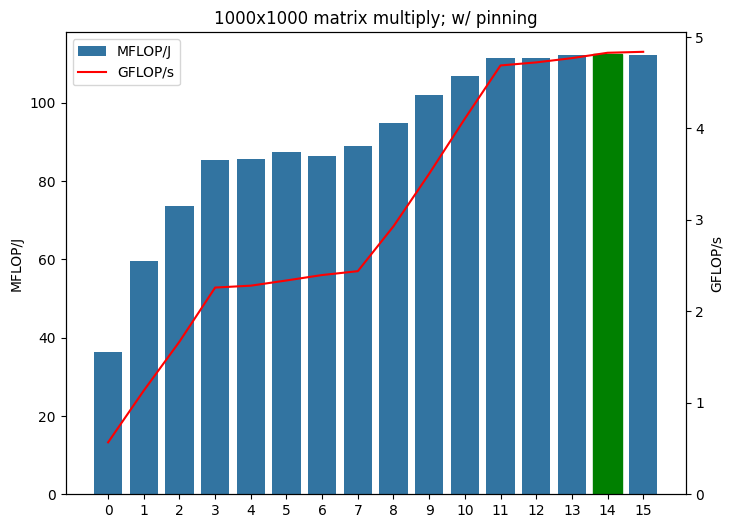

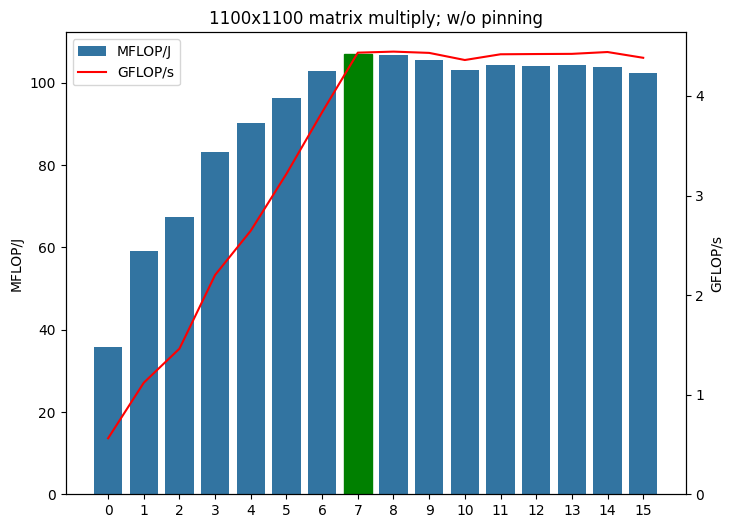

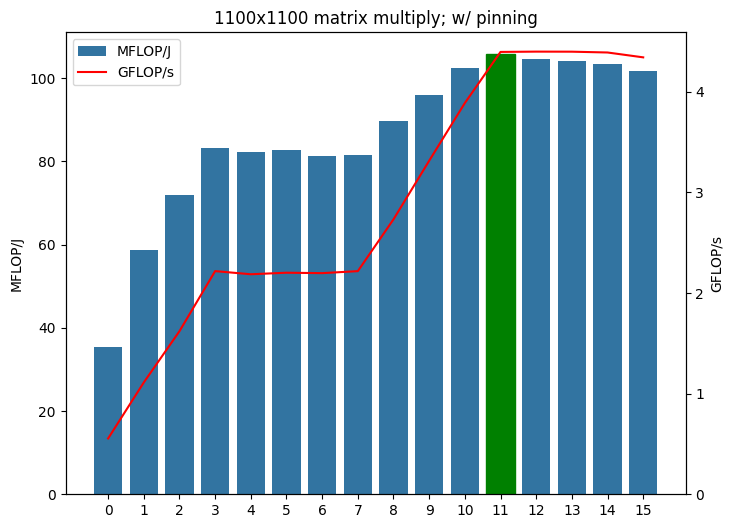

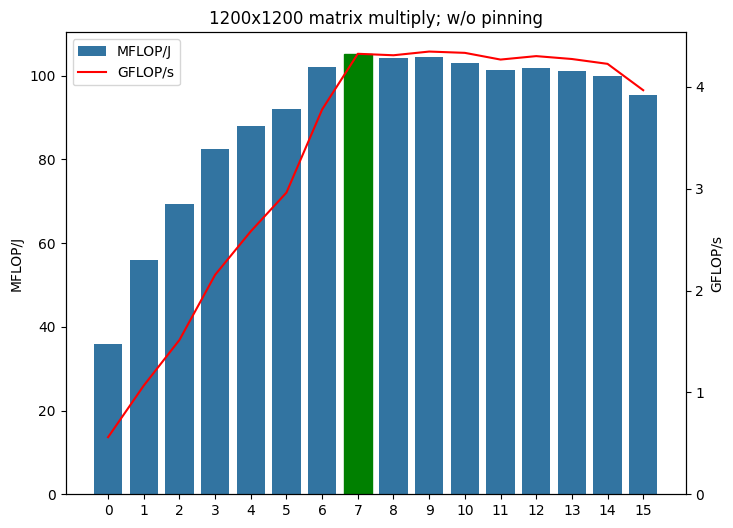

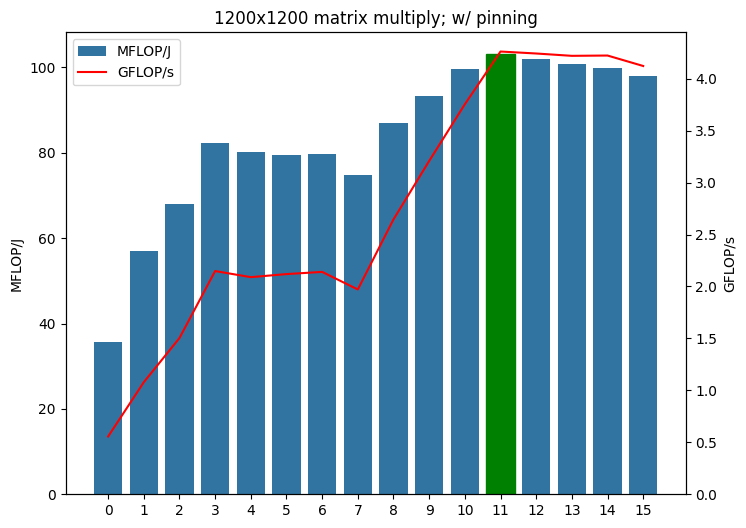

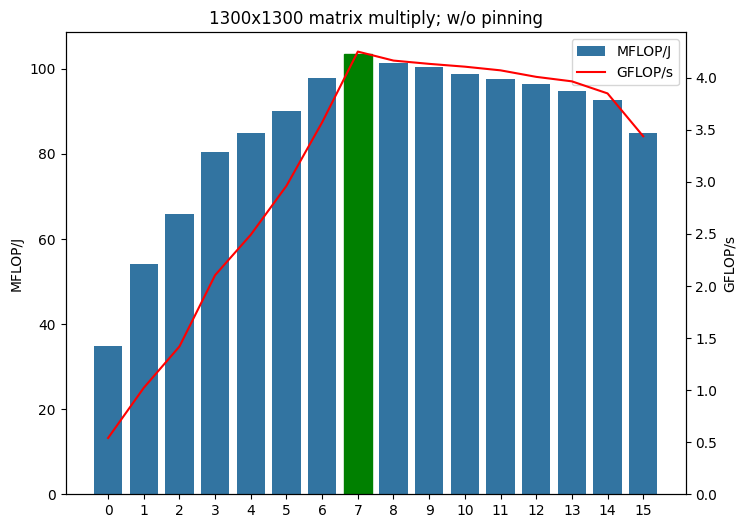

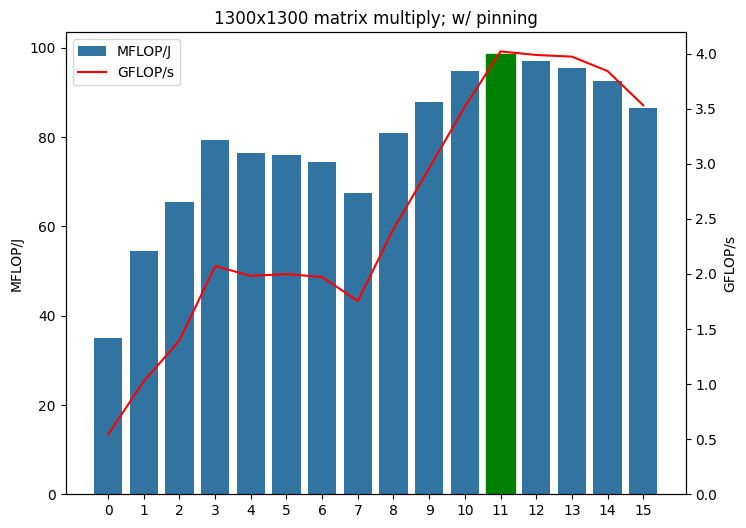

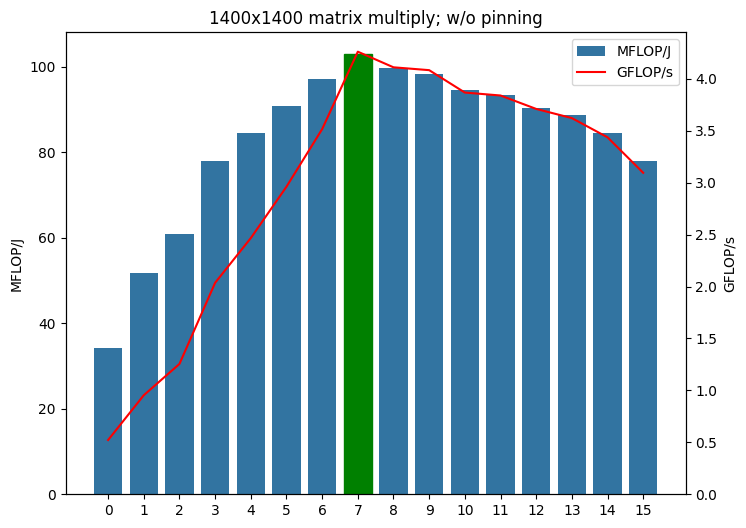

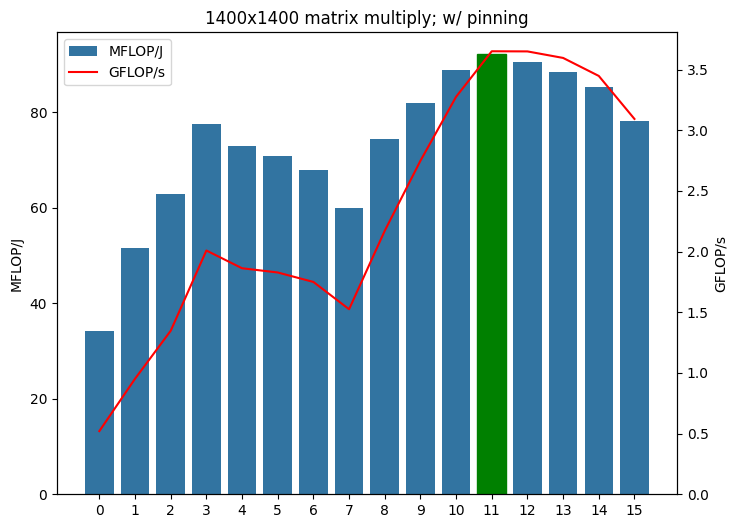

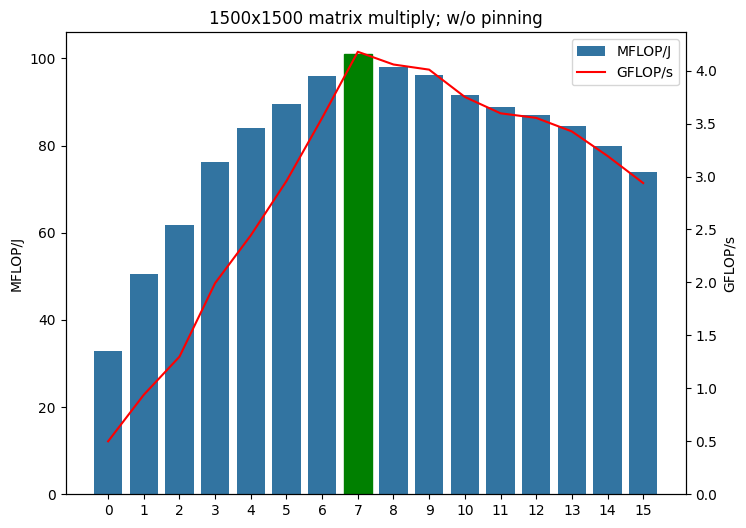

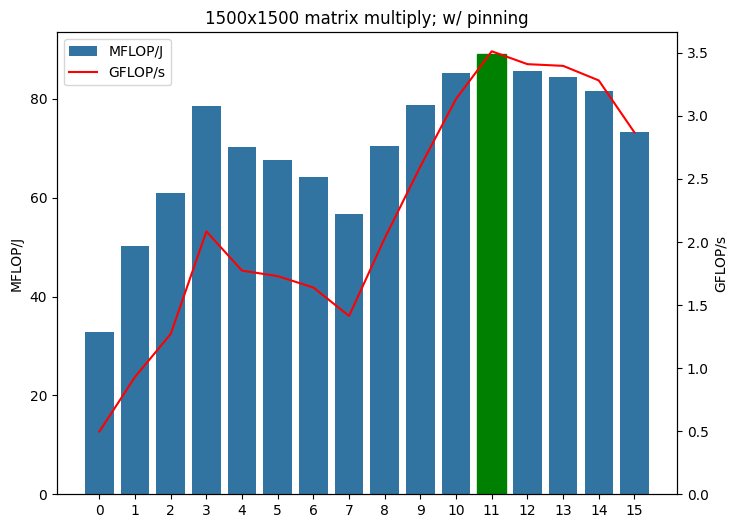

In [5]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()